In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fm = tf.keras.datasets.fashion_mnist
(Xtr,ytr),(Xtst,ytst) = fm.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
Xtr.shape

(60000, 28, 28)

In [6]:
ytr.shape

(60000,)

In [7]:
np.unique(ytr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
cn = ['T-shirt','Trouser','Pullover','Dress',
      'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [9]:
cn[ytr[19]]

'Coat'

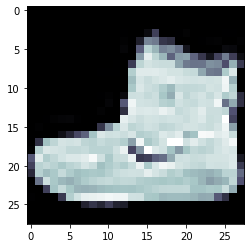

In [10]:
plt.figure()
plt.imshow(Xtr[0],cmap=plt.cm.bone)

In [11]:
cn[ytr[0]]

'Ankle boot'

In [12]:
Xtr = Xtr/255.0
Xtst = Xtst/255.0

In [13]:
nnModel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10)
])

In [17]:
nnModel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
nnModel.fit(Xtr,ytr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5807 - accuracy: 0.7949
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4237 - accuracy: 0.8468
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3853 - accuracy: 0.8593
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3665 - accuracy: 0.8660
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3533 - accuracy: 0.8713
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3395 - accuracy: 0.8743
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3304 - accuracy: 0.8792
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.8829
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8837
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.308

In [19]:
pm=tf.keras.Sequential([nnModel,tf.keras.layers.Softmax()])

In [20]:
y_pred=pm.predict(Xtst)

In [21]:
y_pred[0]

array([1.0171817e-06, 9.9415292e-06, 4.8617562e-07, 2.6020078e-07,
       4.9891963e-07, 5.9980000e-03, 1.1023318e-06, 8.8006537e-03,
       8.2113411e-07, 9.8518723e-01], dtype=float32)

In [29]:
i = 100
classLabel = np.argmax(y_pred[i])

In [30]:
cn[classLabel]

'Dress'

In [31]:
cn[ytst[i]]

'Dress'